# Demo SingleRun
This notebook shows a single run consisting of the following four phases:
* sail empty
* loading
* sail full
* unloading

In [1]:
import datetime, time
import simpy

import shapely.geometry


import pandas as pd
import openclsim.core as core
import openclsim.model as model
import openclsim.plot as plot

# setup environment
simulation_start = 0
my_env = simpy.Environment(initial_time=simulation_start)
registry = {}
keep_resources = {}

In [2]:
Site = type(
    "Site",
    (
        core.Identifiable,
        core.Log,
        core.Locatable,
        core.HasContainer,
        core.HasResource,
    ),
    {},
)

TransportProcessingResource = type(
    "TransportProcessingResource",
    (
        core.Identifiable,
        core.Log,
        core.ContainerDependentMovable,
        core.Processor,
        core.HasResource,
        core.LoadingFunction,
        core.UnloadingFunction,
    ),
    {},
)
location_from_site = shapely.geometry.Point(4.18055556, 52.18664444)
location_to_site = shapely.geometry.Point(4.25222222, 52.11428333)


## Definition of Site

In [3]:
from_site = Site(
    env=my_env,
    name="Winlocatie",
    geometry=location_from_site,
    capacity=100,
    level=95,
)


to_site = Site(
    env=my_env,
    name="Dumplocatie",
    geometry=location_to_site,
    capacity=100,
    level=0,
)

## Definition of Vessels

In [4]:
hopper = TransportProcessingResource(
    env=my_env,
    name="Hopper 01",
    geometry=location_from_site,
    loading_rate=0.00001,
    unloading_rate=0.00001,
    capacity=10,
    compute_v=lambda x: 10,
)

## Defenition of the activities

In [5]:
single_run = [
    model.MoveActivity(
        env=my_env,
        name="sailing empty",
        registry=registry,
        mover=hopper,
        destination=from_site,
    ),
    model.ShiftAmountActivity(
        env=my_env,
        name="Transfer MP",
        registry=registry,
        processor=hopper,
        origin=from_site,
        destination=hopper,
        amount=10,
        duration=1000,
    ),
    model.MoveActivity(
        env=my_env,
        name="sailing filler",
        registry=registry,
        mover=hopper,
        destination=to_site,
    ),
    model.ShiftAmountActivity(
        env=my_env,
        name="Transfer TP",
        registry=registry,
        processor=hopper,
        origin=hopper,
        destination=to_site,
        amount=10,
        duration=1000,
    ),
    model.BasicActivity(
        env=my_env,
        name="Basic activity",
        registry=registry,
        duration=0,
        additional_logs=[hopper],
    ),
]


activity = model.SequentialActivity(
    env=my_env,
    name="Single run process",
    registry=registry,
    sub_processes=single_run,
)


while_activity = model.WhileActivity(
    env=my_env,
    name="while",
    registry=registry,
    sub_processes=[activity],
    condition_event=[{"type": "container", "concept": to_site, "state": "full"}],
)

In [6]:
model.register_processes([while_activity])
my_env.run()

get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 10
put 10 10
get 10 5
put 10 10
get 10 10
put 10 10
get 10 5
put 10 10
get 10 10
put 10 10
get 10 0


In [7]:
plot.get_log_dataframe(hopper, [while_activity, *single_run, activity])

,Activity,Timestamp,ActivityState,geometry,container level,type,ref
0,sailing empty,1970-01-01 00:00:00.000000,START,POINT (4.18055556 52.18664444),0.0,NaN,NaN
1,sailing empty,1970-01-01 00:00:00.000000,STOP,POINT (4.18055556 52.18664444),0.0,NaN,NaN
2,Transfer MP,1970-01-01 00:00:00.000000,START,POINT (4.18055556 52.18664444),0.0,NaN,NaN
3,Transfer MP,1970-01-01 00:16:40.000000,STOP,POINT (4.18055556 52.18664444),10.0,NaN,NaN
4,sailing filler,1970-01-01 00:16:40.000000,START,POINT (4.18055556 52.18664444),10.0,NaN,NaN
...,...,...,...,...,...,...,...
95,sailing filler,1970-01-01 10:15:13.667234,STOP,POINT (4.25222222 52.11428333),5.0,NaN,NaN
96,Transfer TP,1970-01-01 10:15:13.667234,START,POINT (4.25222222 52.11428333),5.0,NaN,NaN
97,Transfer TP,1970-01-01 10:31:53.667234,STOP,POINT (4.25222222 52.11428333),0.0,NaN,NaN
98,Basic activity,1970-01-01 10:31:53.667234,START,POINT (4.25222222 52.11428333),0.0,additional log,01757787-e180-4d96-90d0-22b19cd0ae70


In [8]:
 plot.vessel_planning([hopper, from_site, to_site])

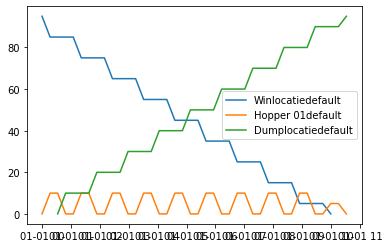

In [9]:
fig = plot.get_step_chart([from_site, hopper, to_site])

In [10]:
my_env.now

37913.66723419497

In [11]:
min(1,2,3)

1